<a href="https://colab.research.google.com/github/Unarine940/unarine/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import pymc3 as pm
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
import arviz as az

In [49]:
def f(x) :
  return (np.cos(2 * np.pi * x))
x = np.linspace(0,4*np.pi,10)

f(x)


array([ 1.        , -0.79499544,  0.26403549,  0.37518142, -0.86057052,
        0.99311785, -0.7184778 ,  0.14925529,  0.48116325, -0.91430047])

In [0]:
eps = np.random.normal(0,12,10)
y = f(x) + eps

In [51]:
y

array([  1.42141118,  17.70161785,   0.63696247,   2.94992557,
       -17.04510071,  -2.66960412,  -5.40888126, -15.70813679,
        25.18841936, -22.53520801])

In [0]:

poly1 = np.polyfit(x,y,1)
poly2 = np.polyfit(x,y,2)
poly3 = np.polyfit(x,y,3)
poly4 = np.polyfit(x,y,4)
poly5 = np.polyfit(x,y,5)
poly6 = np.polyfit(x,y,6)
poly7 = np.polyfit(x,y,7)
poly8 = np.polyfit(x,y,8)
poly9 = np.polyfit(x,y,9)


In [0]:
x1 = np.linspace(0, 4*np.pi,10)
y1 = np.polyval(poly1,x1)

x2 = np.linspace(0, 4*np.pi,10)
y2 = np.polyval(poly2,x2)

x3 = np.linspace(0, 4*np.pi,10)
y3 = np.polyval(poly3,x3)

x4 = np.linspace(0, 4*np.pi,10)
y4 = np.polyval(poly4,x4)

x5 = np.linspace(0, 4*np.pi,10)
y5 = np.polyval(poly5,x5)

x6 = np.linspace(0, 4*np.pi,10)
y6 = np.polyval(poly6,x6)

x7 = np.linspace(0, 4*np.pi,10)
y7 = np.polyval(poly7,x7)

x8 = np.linspace(0, 4*np.pi)
y8 = np.polyval(poly8,x8)

x9 = np.linspace(0, 4*np.pi)
y9 = np.polyval(poly9,x9)


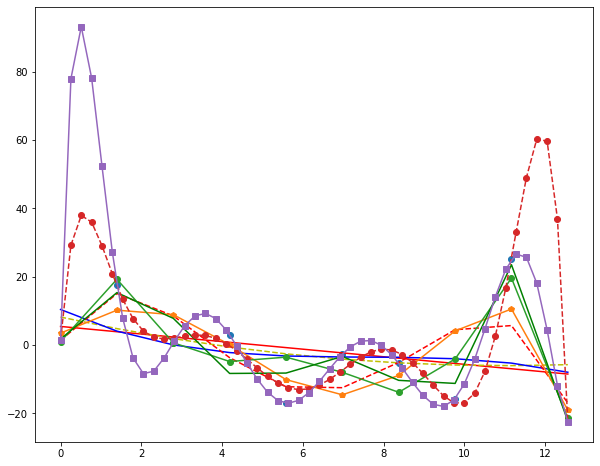

In [54]:
plt.figure(figsize = (10,8))

plt.plot(x,y, 'o', label = 'train')
plt.plot(x1,y1,'r-',label = 'degree 1')
plt.plot(x2,y2,'y--',label = 'degree 2')
plt.plot(x3,y3,'b-',label = 'degree 3')
plt.plot(x4,y4,'r--',label = 'degree 4')
plt.plot(x5,y5,'p-',label = 'degree5')
plt.plot(x6,y6,'o-',label = 'degree 6')
plt.plot(x7,y7,'g-',label= 'degree 7')
plt.plot(x8,y8,'o--',label = 'degree 8')
plt.plot(x9,y9,'s-',label = 'degree 9')
plt.show()


In [45]:
d_dict = {'poly1':poly1,'poly2':poly2,'poly3':poly3,'poly4':poly4,'poly5':poly5,'poly6':poly6,'poly7':poly7,'poly8':poly8,'poly9':poly9}
min_length = 10

df = pd.DataFrame({k:pd.Series(v[:min_length])for k,v in d_dict.items()})
print (df)

      poly1      poly2      poly3  ...       poly7       poly8        poly9
0  1.902588   3.453823   0.330652  ...    1.171600   -0.029360     0.599490
1 -9.190417 -15.366525   0.973935  ...  -19.539409    1.758803   -13.517883
2       NaN   3.601520 -10.661882  ...  128.707528  -24.334895   129.232033
3       NaN        NaN   2.172778  ... -427.339024  149.259611  -681.455479
4       NaN        NaN        NaN  ...  755.178993 -476.697890  2155.808883
5       NaN        NaN        NaN  ... -675.847826  820.599256 -4159.289118
6       NaN        NaN        NaN  ...  234.623081 -719.215127  4740.028516
7       NaN        NaN        NaN  ...   -5.090059  245.375429 -2894.894734
8       NaN        NaN        NaN  ...         NaN   -5.097571   716.337269
9       NaN        NaN        NaN  ...         NaN         NaN    -5.120127

[10 rows x 9 columns]


In [31]:
rms_1 = sqrt(mean_squared_error(y, y1))
print('RMS for polynomial of degree 1 is:',rms_1 )

rms_2 = sqrt(mean_squared_error(y, y2))
print('RMS for polynomial of degree 2 is:',rms_2 )

rms_3 = sqrt(mean_squared_error(y, y3))
print('RMS for polynomial of degree 3 is:',rms_3 )

rms_4 = sqrt(mean_squared_error(y, y4))
print('RMS for polynomial of degree 4 is:',rms_4 )

rms_5 = sqrt(mean_squared_error(y, y5))
print('RMS for polynomial of degree 5 is:',rms_5 )

rms_6 = sqrt(mean_squared_error(y, y6))
print('RMS for polynomial of degree 6 is:',rms_6 )

rms_7 = sqrt(mean_squared_error(y, y7))
print('RMS for polynomial of degree 7 is:',rms_7 )



RMS for polynomial of degree 1 is: 11.822047905488992
RMS for polynomial of degree 2 is: 29.155289687814587
RMS for polynomial of degree 3 is: 20.34546644338891
RMS for polynomial of degree 4 is: 1793.2934480977208
RMS for polynomial of degree 5 is: 18875.299763060622
RMS for polynomial of degree 6 is: 228623.87028381968
RMS for polynomial of degree 7 is: 228623.87028381968


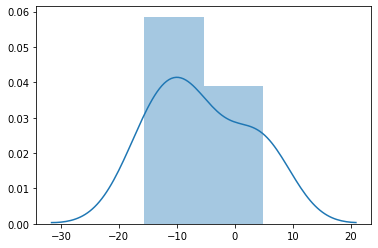

In [32]:
 #coefficents
β = np.polyfit(x,y,3)
α = np.polyfit(x,y,3)[0]

sns.distplot(y)

In [33]:
with pm.Model() as Polynomial:
    # Priors 
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10,shape = 4)
    # Expected 
    μ = α + β[1]*x1 + β[2]*x2 + β[3]*x3
    
    # Likelihood 
    y_ = pm.Normal('y_', mu=μ, observed=y)
    trace = pm.sample(2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]
100%|██████████| 3000/3000 [03:48<00:00, 13.12it/s]


In [0]:
az.plot_trace(trace)
az.summary(y)